<a href="https://colab.research.google.com/github/Rpriyadharshini2732/RPriyadharshini/blob/master/banking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**

**AIM:**
      
###      To identify the potential customers who have a higher probability of purchasing the loan , to sell more personal loan and to improve the success ratio with a minimal budget 


## ***1. Import the datasets and libraries***
To perform the analysis of data for that certain libraries are required .Hence the libraries also imported.




In [ ]:
 #importing libaries
 import numpy as np
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 %matplotlib inline


Data is uploaded.

In [5]:
#Uploading the file which contains data 
from google.colab import files 
uploaded =files.upload()

Saving Bank_data.csv to Bank_data.csv


In [6]:
#Import the datasets
import io
bank_data=pd.read_csv(io.BytesIO(uploaded['Bank_data.csv']))

In [7]:
#to display the top 5 rows using the function head()
bank_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


we printed top 5 rows.we observed that the data consist of rows(5000customers details) and column(details of customers like id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal loan,securities,cd account,online ,credit card).

In [8]:
#To display the bottom 5 rows using the function tail()
bank_data.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


we printed the bottom 5 rows.


In [9]:
#checking datatype of each column
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
#statistical summary of the data
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
#shape of the data that gives the no of reows and column
bank_data.shape

(5000, 14)

The table of data consist of 5000 rows and 14 column.It's identified by using the function 'shape'.

In [12]:
#checking whether the data contains null value
bank_data.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

To check whether the data contains nullvalue or not.It is done by using the function isnull .

## ***2.Cleaning the data***
(i.e)
The data might not be useful to acheive the correct destination.Hence removing those data.let's check that whether age and experience are correlated.


In [13]:
experience=bank_data['Experience']
age=bank_data['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

99%correlated from that we come to know the age and experience are highly correlated.Hence we use age column only and dropping the unneccessary experience column.And the id column is also not required to achieve the destination.hence we can drop th ID column also.

In [14]:
bank_data=bank_data.drop(['ID','Experience'],axis=1 )
bank_data.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


After dropping the id and experience column .we displayed the data.

# **3. Exploratory Data Analysis(EDA)**
Study the data distribution in each attribute and target variable(i.e In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.) 

In [15]:
#Number of unique in each column
bank_data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Zipcode has467 distinct values.It is a nominal variable which has too many levels.It's better to drop Zipcode as well.

In [16]:
bank_data=bank_data.drop(['ZIP Code'],axis=1 )
bank_data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [17]:
#To find the number of people with 0 mortgage
(bank_data.Mortgage==0).sum()

3462

There were 3462 people with 0 mortgage

In [18]:
#To find the number of people 0 average credit card spending per month
(bank_data.CCAvg==0).sum()

106

let's try to print the value counts for all the categorical column

In [19]:
bank_data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

we come to know about the family size of the customer by displaying the count of family.
let's see the education status of the customer.

In [20]:
bank_data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

we can say that most of us are graduated .lets analyse the securities account 

In [21]:
bank_data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

90% of the customers with non securities account only 10% customers with  securities account.
lets see the no of customers whether they having the deposit account or not in the bank

In [22]:
bank_data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

only 7% customers having the deposit account.remaining 93% not having the cd account.lets see the how many of them using credit card .

In [23]:
bank_data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

29% of them using credit card and 71 are not using creditcard.let analyse the usage of online facilities.hnce we can conclude most of us are not using the creditcard.

In [24]:
bank_data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

59% of them using online facilities.only 41% are not using online fscilities.

# *Univariate Analysis*
Univariate analysis is the analysis carried out on only one (“uni”) variable (“variate”) to summarize or describe the variable

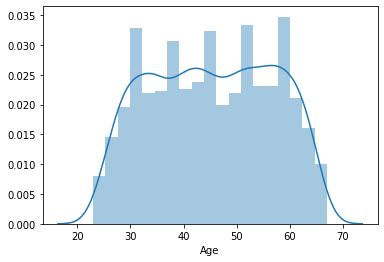

In [25]:
sns.distplot(bank_data.Age);

we plotted the graph using the function distplot.It's clearly shows the maximum range of people lies between the age 20 to 70.age seems to have a symmetric distribution.

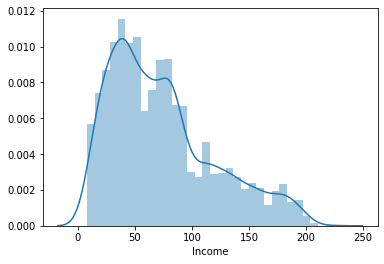

In [26]:
sns.distplot(bank_data.Income);

Income is skewed distribution.((i.e)a distribution is said to be skewed when the data points cluster more toward one side of the scale than the other, creating a curve that is not symmetrical.)

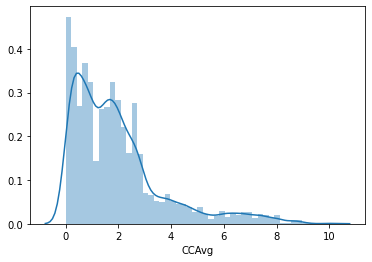

In [27]:
#CCAvg is skewed distribution
sns.distplot(bank_data.CCAvg);

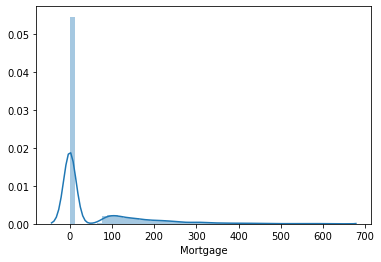

In [28]:
sns.distplot(bank_data.Mortgage);

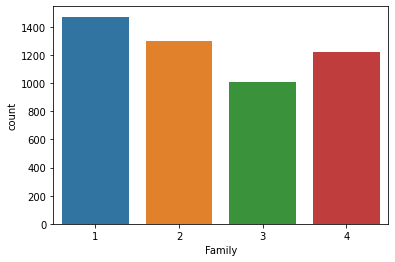

In [29]:
#plotting the bar_chart graph for family 
sns.countplot(bank_data.Family);

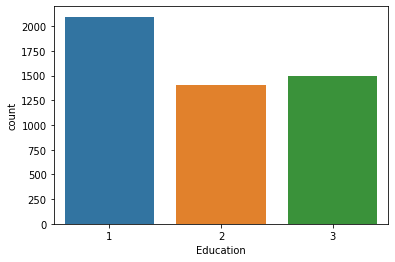

In [30]:
#plotting the bar_chart graph for education
sns.countplot(bank_data.Education)


# *Multivariate analysis*
 Multivariate data analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables.

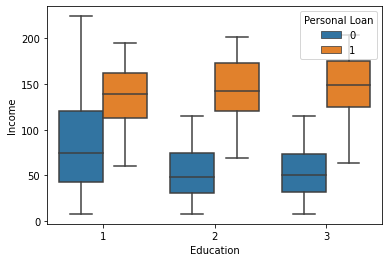

In [31]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_data);

The customers whose has more income is granted for the loan across each education level.

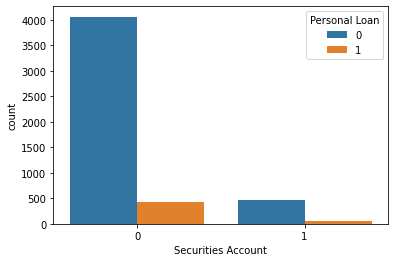

In [32]:
#majority of the customer having security account do't have personal loan
sns.countplot(x="Securities Account",data=bank_data,hue="Personal Loan");

Majority of people having securities account don't have personal loan.

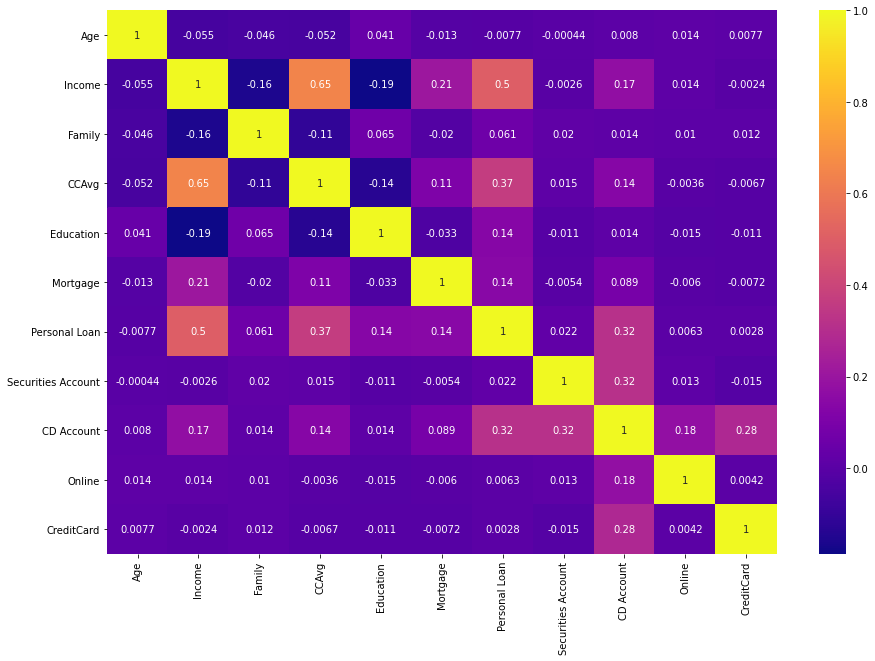

In [33]:
#After dropping experience column earlier doesn't seem to be significant correation between other variables except ccavg and income
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(bank_data.corr(),cmap='plasma',annot=True);

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

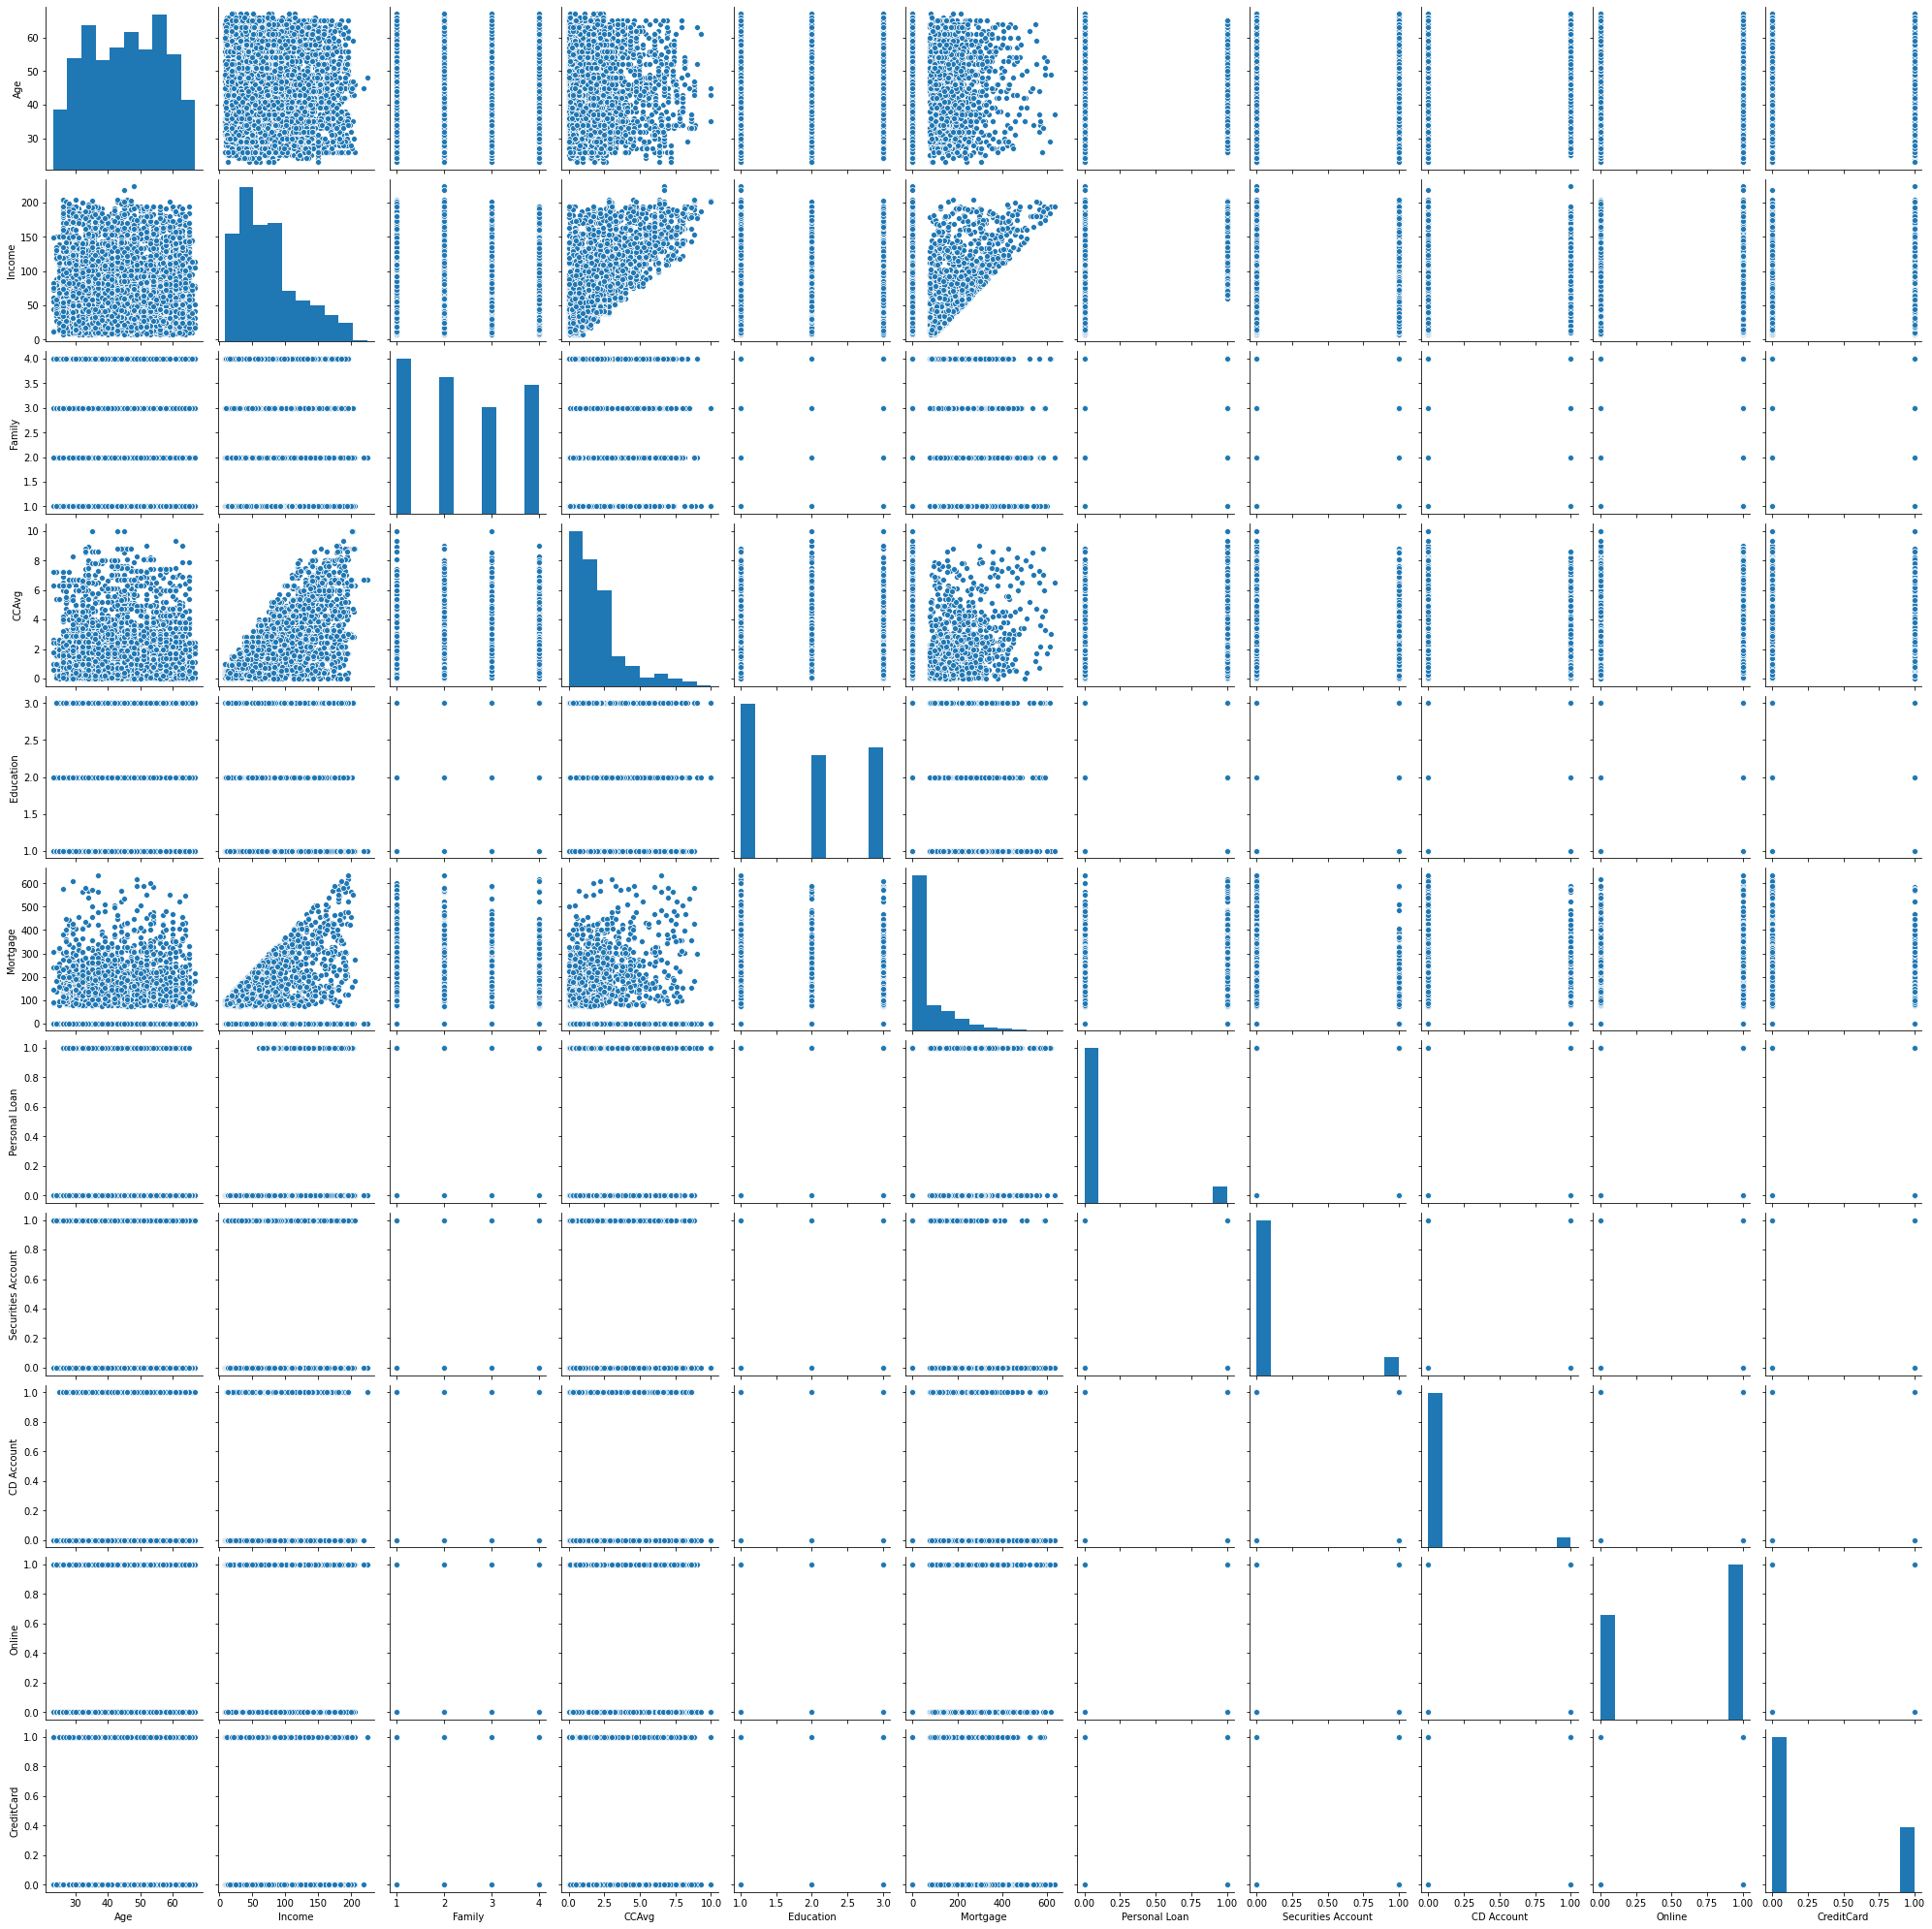

In [34]:
sns.pairplot(bank_data)

# ***4.Transformations for the feature variables***
Feature transformation is the name given to replacing our original features with functions of these features.The result of these functions is itself a random variable

In [35]:
data_X=bank_data.loc[:,bank_data.columns !="Personal Loan"]
data_Y=bank_data[["Personal Loan"]]

Here data_X represents  the features for our model(except personal loan).

data_Y represents personal loan

The **Yeo-Johnson transform** is also named for the authors.

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

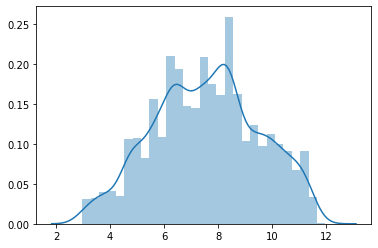

In [36]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
income=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(income);

Income is skewed .Hence the income is transformed by using power transformer method("**yeo-johnson**").After transformed the income,then the graph is plotted.

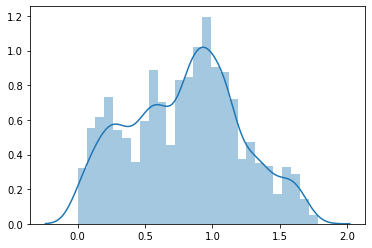

In [37]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
ccavg=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(ccavg);

CCAvg is skewed .Hence the CCAvg is transformed by using power transformer method("**yeo-johnson**").After transformed the CCAvg,then the graph is plotted.Now we have to transform the mortgage column.

**Statistical data binning** is a way to group numbers of more or less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals (for example, grouping every five years together). It can also be used in multivariate statistics, binning in several dimensions at once.

In [38]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


# ***5. Normalise the data and split the data into training and test set***

In [39]:
from sklearn.model_selection import train_test_split

# Splitting the data into training set and test set.
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

In [40]:
train_X.reset_index(drop=True,inplace=True)
test_X.reset_index(drop=True,inplace=True)
train_Y.reset_index(drop=True,inplace=True)
test_Y.reset_index(drop=True,inplace=True)

In [41]:
train_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,3,0.4,1,0,0,1,1,0
1,64,35,1,1.5,2,1,0,0,0,0
2,52,31,4,1.8,1,0,0,1,1,0
3,32,20,1,0.5,3,0,0,1,0,1
4,62,54,1,0.8,1,1,0,0,1,0


In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(train_X.columns):

# Create an instance of the scaler and apply it to the data
  scaler = StandardScaler()

  scaler.fit(train_X[[column]])

  np_array = scaler.transform(train_X[[column]])
  train_X.loc[: , column] = pd.Series(np_array.flatten())

  np_array = scaler.transform(test_X[[column]])
  test_X.loc[: , column] = pd.Series(np_array.flatten())



In [43]:
#Different performance metrics are used to evaluate different Machine Learning Algorithms. For example a classifier used to distinguish between images of different objects; 
#we can use classification performance metrics such as, recall_score, Average Accuracy, AUC,f1_score etc.
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

np_train_X = train_X.values
np_train_Y = train_Y.values
np_test_X = test_X.values
np_test_Y = test_Y.values

In [44]:
#confusion matrix is We want to predict some data using Classification in Machine Learning.
def draw_cm(actual,predicted):
  cm=confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

In [45]:
  #shape of the data that gives the no of rows and column
  np_test_Y.shape

(1500, 1)

## **LOGISTIC REGRESSION**
**"Logistic Regression model to predict the likelihood of a customer buying
personal loans".**,where Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.

In [46]:
from sklearn.linear_model import LogisticRegression
class_1=LogisticRegression(random_state=0)

class_1.fit(np_train_X,np_train_Y.ravel())
pred_1_test_X=class_1.predict(np_test_X)
pred_1_train_X=class_1.predict(np_train_X)
acc_1_train_X=accuracy_score(np_train_Y,pred_1_train_X)
acc_1_test_X=accuracy_score(np_test_Y,pred_1_test_X)
print("Base learner 1 accuracy on np_train_X: {:.4f}".format(acc_1_train_X))
print("Base learner 1 accuracy on np_test_X: {:.4f}".format(acc_1_test_X))


Base learner 1 accuracy on np_train_X: 0.9520
Base learner 1 accuracy on np_test_X: 0.9520


Confusion Matrix


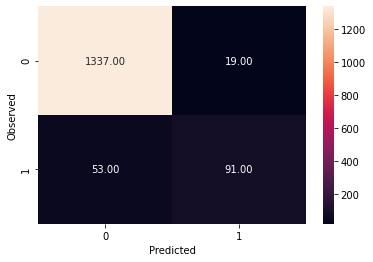

None


In [47]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_1_test_X))

In [48]:
print("Recall:",recall_score(np_test_Y,pred_1_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_1_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_1_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_1_test_X))


Recall: 0.6319444444444444

Precision: 0.8272727272727273

F1 Score: 0.7165354330708661

Roc Auc Score: 0.8089663225172075


## **DECISION TREE CLASSIFIER**
Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

In [49]:
from sklearn.tree import DecisionTreeClassifier
class_2=DecisionTreeClassifier(random_state=0,max_depth=8)


class_2.fit(np_train_X,np_train_Y.ravel())
pred_2_test_X=class_2.predict(np_test_X)
pred_2_train_X=class_2.predict(np_train_X)
acc_2_train_X=accuracy_score(np_train_Y,pred_2_train_X)
acc_2_test_X=accuracy_score(np_test_Y,pred_2_test_X)
print("Base learner 2 accuracy on np_train_X: {:.4f}".format(acc_2_train_X))
print("Base learner 2 accuracy on np_test_X: {:.4f}".format(acc_2_test_X))

Base learner 2 accuracy on np_train_X: 0.9957
Base learner 2 accuracy on np_test_X: 0.9813


Confusion Matrix


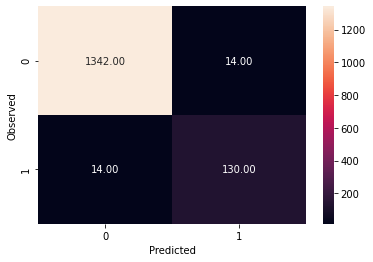

None


In [50]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_2_test_X))

In [51]:
print("Recall:",recall_score(np_test_Y,pred_2_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_2_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_2_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_2_test_X))

Recall: 0.9027777777777778

Precision: 0.9027777777777778

F1 Score: 0.9027777777777778

Roc Auc Score: 0.9462266470009832


## **RANDOM FOREST CLASSIFIER**
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [52]:
from sklearn.ensemble import RandomForestClassifier

class_3=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)


class_3.fit(np_train_X,np_train_Y.ravel())
pred_3_test_X=class_3.predict(np_test_X)
pred_3_train_X=class_3.predict(np_train_X)
acc_3_train_X=accuracy_score(np_train_Y,pred_3_train_X)
acc_3_test_X=accuracy_score(np_test_Y,pred_3_test_X)
print("Base learner 3 accuracy on np_test_X: {:.4f}".format(acc_3_train_X))
print("Base learner 3 accuracy on np_test_X: {:.4f}".format(acc_3_test_X))


Base learner 3 accuracy on np_test_X: 0.9949
Base learner 3 accuracy on np_test_X: 0.9873


Confusion Matrix


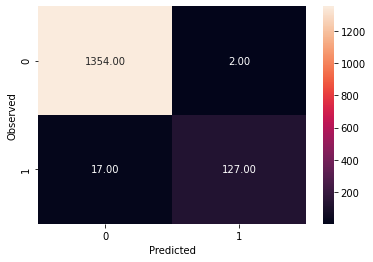

None


In [53]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_3_test_X))

In [54]:
print("Recall:",recall_score(np_test_Y,pred_3_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_3_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_3_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_3_test_X))


Recall: 0.8819444444444444

Precision: 0.9844961240310077

F1 Score: 0.9304029304029303

Roc Auc Score: 0.9402347590953786


## **NAIVE BAYES** 
Naive Bayes classifiers are a collection of classification algorithms based on **Bayes Theorem**.(i.e)every pair of features being classified is independent of each other.

In [55]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(np_train_X,np_train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
GaussianNB(priors=None,var_smoothing=1e-09)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
pred_Y=model.predict(np_test_X)

In [58]:
print("Recall:",recall_score(np_test_Y,pred_Y))
print()
print("Precision:",precision_score(np_test_Y,pred_Y))
print()
print("F1 Score:",f1_score(np_test_Y,pred_Y))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_Y))



Recall: 0.6111111111111112

Precision: 0.43781094527363185

F1 Score: 0.5101449275362319

Roc Auc Score: 0.7638888888888888


Confusion Matrix


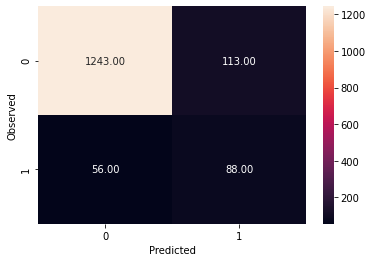

None


In [59]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_Y))

## **KNN ALGORITHM**
K-Nearest Neighbors (KNN) algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors. 

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(np_train_X,np_train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                     metric='minkowski', metric_params=None, n_jobs=None)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
pred_Y=neighbor.predict(np_test_X)

In [63]:
print("Recall:",recall_score(np_test_Y,pred_Y))
print()
print("Precision:",precision_score(np_test_Y,pred_Y))
print()
print("F1 Score:",f1_score(np_test_Y,pred_Y))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_Y))


Recall: 0.6736111111111112

Precision: 0.9603960396039604

F1 Score: 0.7918367346938776

Roc Auc Score: 0.8353306293018682


Confusion Matrix


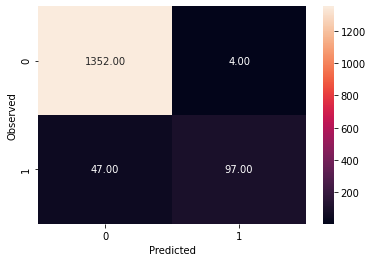

None


In [64]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_Y))

# **CONCLUSION:**

Primary aim of the project is to identify the potential
customers who have a higher probability of purchasing the loan.Hence we have to make a model predict whether the person will take personal loan or not.For that


*   Initial step of the project **we imported the libraries and data**.After importing we done the analysis of data (i.e check datatype, statistical summary, shape, nullvalues etc) 

*   After analysing the data,we found that age and experience are **highly correlated**.Hence we dropped the experience column.ID and ZIP Code were not mostly used to predict the person taking loan.So that unnecessary datas dropped.

*  After cleaning the data .we done Study the data distribution in each attribute and target variable in the exploratory data analysis by **univariate **(where age is symmetric distribution,income and CCAvg are Skewed distribution)and** multivariate analysis**(by plotting graphs we analysed that the customers whose has more income is granted for the loan across each education level.)

*  Income and CCAvg column is** skewed **.Hence the income  and CCAvg is 
transformed by using power transformer method("**yeo-johnson**") to normalise them.

*   Mortgage column was also skewed .Hence we need to normalise them .But since it was a discrete column rather normalise them by power transform,we use **binning technique.**

*   After this we used several models to make predictions,the models are logistic regression,random forest,decision tree classifier,knn algorithm,navie bayes.







In the models we done the analysis of metrics such as confusion_matrix , recall_score, precision_score, f1_score, roc_auc_score, accuracy_score.

## ***LOGISTIC REGRESSION***
            Accuracy (95%)
            Recall: 0.6319444444444444
            Precision: 0.8272727272727273
            F1 Score: 0.7165354330708661
            Roc Auc Score: 0.8089663225172075
## ***DECISION TREE CLASSIFIER***
            Accuracy (99%)
            Recall: 0.9027777777777778
            Precision: 0.9027777777777778
            F1 Score: 0.9027777777777778
            Roc Auc Score: 0.9462266470009832
  
## *** RANDOM FOREST CLASSIFIER***
             Accuracy (99%)
             Recall: 0.8819444444444444
             Precision: 0.9844961240310077
             F1 Score: 0.9304029304029303
             Roc Auc Score: 0.9402347590953786
            
## ***NAIVE BAYES***
            Recall: 0.6111111111111112
            Precision: 0.43781094527363185
            F1 Score: 0.5101449275362319
            Roc Auc Score: 0.7638888888888888

## ***KNN ALGORITHM ***
            Recall: 0.6736111111111112
            Precision: 0.9603960396039604
            F1 Score: 0.7918367346938776
            Roc Auc Score: 0.8353306293018682



